In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import math

In [30]:
data = pd.read_csv('/content/nifty_DS5.csv')
# Check the structure of the dataset (data types, missing values, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      248 non-null    object 
 1   Open      248 non-null    float64
 2   High      248 non-null    float64
 3   Low       248 non-null    float64
 4   Close     248 non-null    float64
 5   Volume    248 non-null    int64  
 6   Turnover  248 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 13.7+ KB


In [31]:
# Check for missing values and summary statistics of numerical columns
data.describe()

,Open,High,Low,Close,Volume,Turnover
count,248.000000,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02
mean,11601.495968,11673.756250,11505.632056,11585.626613,1.383053e+07,1.354940e+10
std,468.997883,472.763542,462.203401,466.678465,6.401886e+06,5.461539e+09
min,10840.650000,10950.250000,10759.850000,10798.250000,7.952400e+05,8.272000e+08
25%,11214.762500,11268.200000,11133.312500,11210.200000,9.304708e+06,9.438500e+09
50%,11524.625000,11578.075000,11418.975000,11503.850000,1.218344e+07,1.259385e+10
75%,11927.637500,11999.187500,11787.050000,11886.337500,1.667710e+07,1.657345e+10
max,12885.750000,12908.100000,12635.500000,12855.900000,4.461970e+07,3.685160e+10


In [32]:
# Convert 'Date' column to datetime format for time series analysis
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set the 'Date' column as the index for time series analysis
data.set_index('Date', inplace=True)

# Checking the structure after the preprocessing steps
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      248 non-null    float64
 1   High      248 non-null    float64
 2   Low       248 non-null    float64
 3   Close     248 non-null    float64
 4   Volume    248 non-null    int64  
 5   Turnover  248 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 13.6 KB


In [33]:
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3575100000
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9645600000
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,10590000000
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,13645000000
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,12034400000


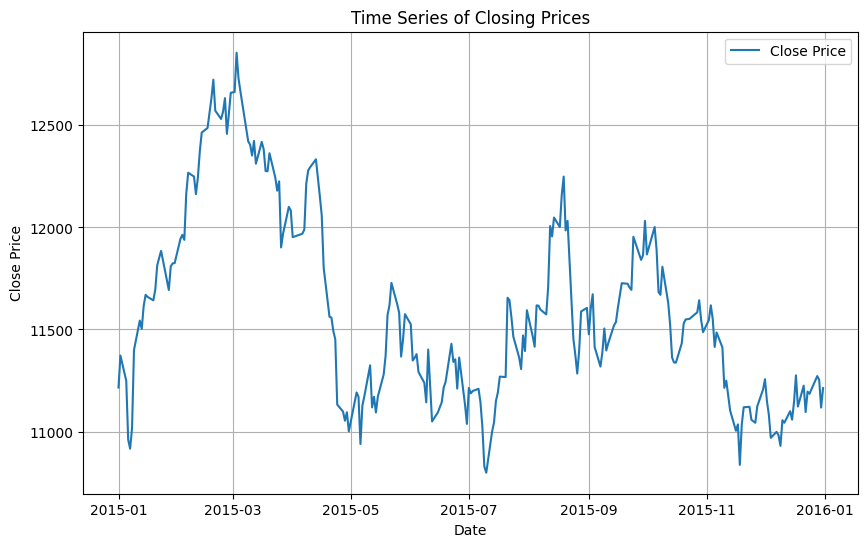

In [34]:
# Time series plot for the 'Close' prices to observe trends and seasonality
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title('Time Series of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

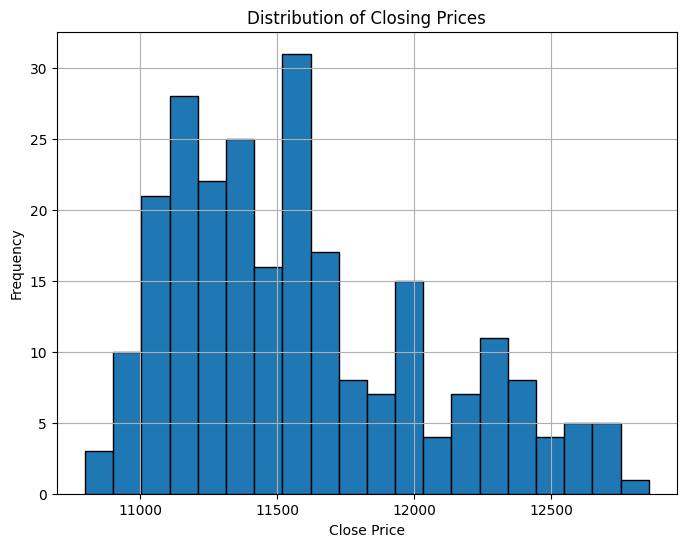

In [35]:
# Histogram to understand the distribution of 'Close' prices
plt.figure(figsize=(8, 6))
plt.hist(data['Close'], bins=20, edgecolor='black')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

EDA

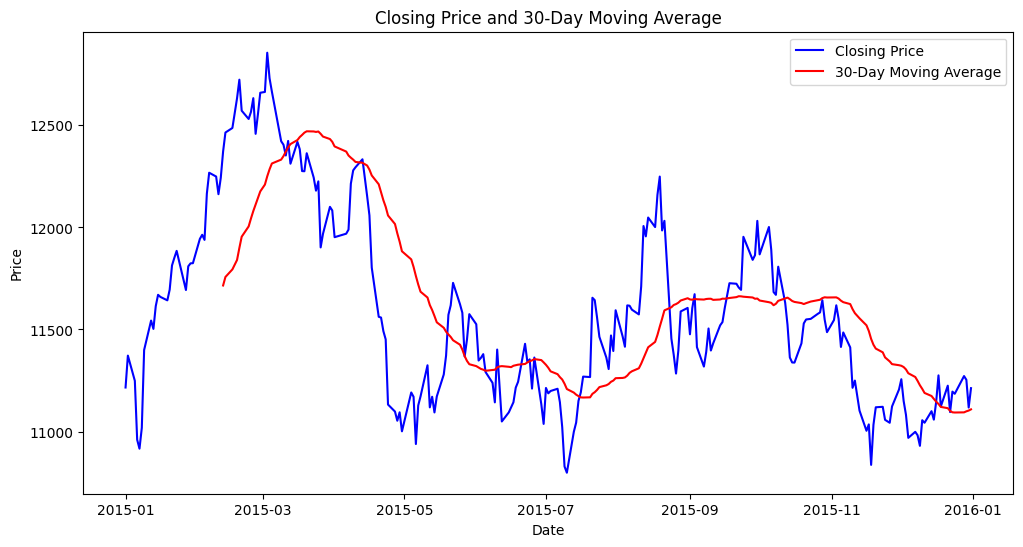

In [36]:
# Calculate the moving average (window size can be adjusted, e.g., 30 for 30-day MA)
data['Moving_Average_30'] = data['Close'].rolling(window=30).mean()

# Plot the closing price and moving average
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['Moving_Average_30'], label='30-Day Moving Average', color='red')
plt.title('Closing Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
data_for_evaluation = data.dropna(subset=['Moving_Average_30'])
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(data_for_evaluation['Close'],
data_for_evaluation['Moving_Average_30']))

# Calculate MSE
mse = mean_squared_error(data_for_evaluation['Close'],
data_for_evaluation['Moving_Average_30'])

print("RMSE:", rmse)
print("MSE:", mse)

RMSE: 343.0400803653819
MSE: 117676.4967370877


Moving Average Evaluation

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


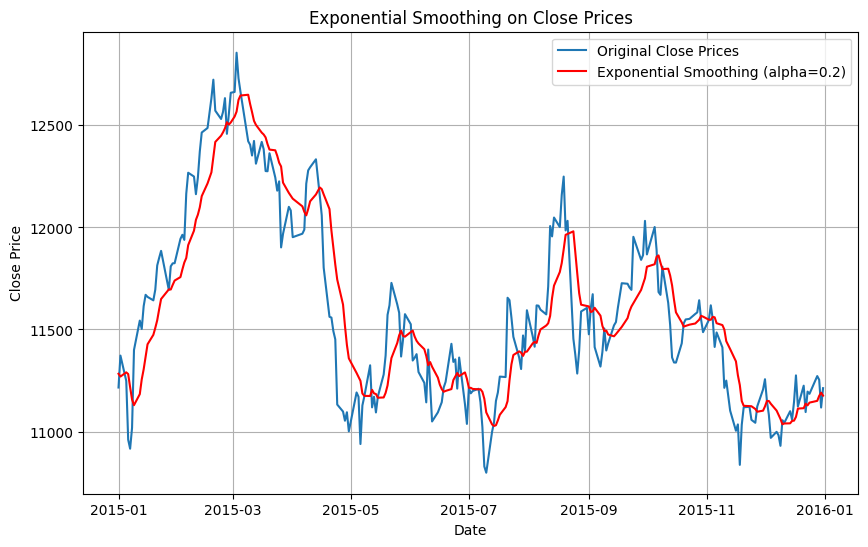

In [38]:
exp_smoothing_model = ExponentialSmoothing(data['Close'], trend=None, seasonal=None, seasonal_periods=None)
exp_smoothing_fit = exp_smoothing_model.fit(smoothing_level=0.2)  # You can adjust the smoothing level (alpha)

# Plot the original data along with smoothed data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Original Close Prices')
plt.plot(data.index, exp_smoothing_fit.fittedvalues, label='Exponential Smoothing (alpha=0.2)', color='red')
plt.title('Exponential Smoothing on Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


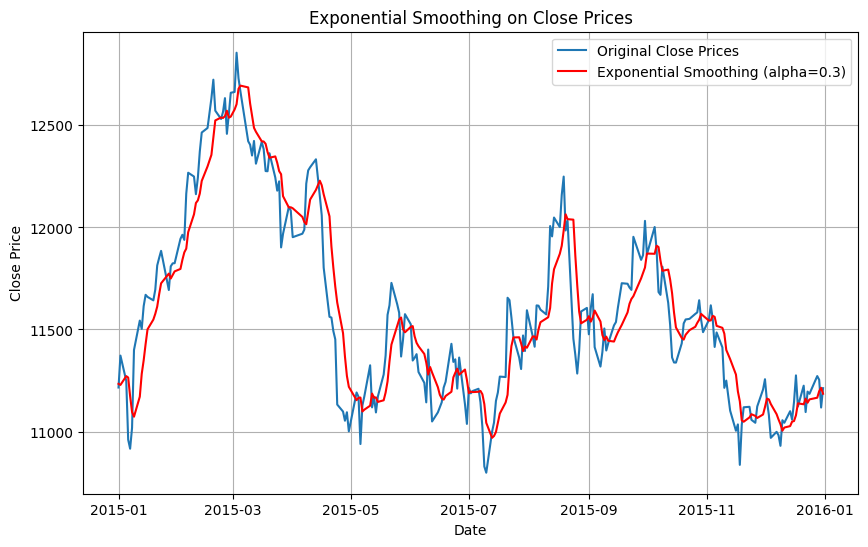

In [39]:
exp_smoothing_model = ExponentialSmoothing(data['Close'], trend=None, seasonal=None, seasonal_periods=None)
exp_smoothing_fit1 = exp_smoothing_model.fit(smoothing_level=0.3)  # You can adjust the smoothing level (alpha)

# Plot the original data along with smoothed data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Original Close Prices')
plt.plot(data.index, exp_smoothing_fit1.fittedvalues, label='Exponential Smoothing (alpha=0.3)', color='red')
plt.title('Exponential Smoothing on Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


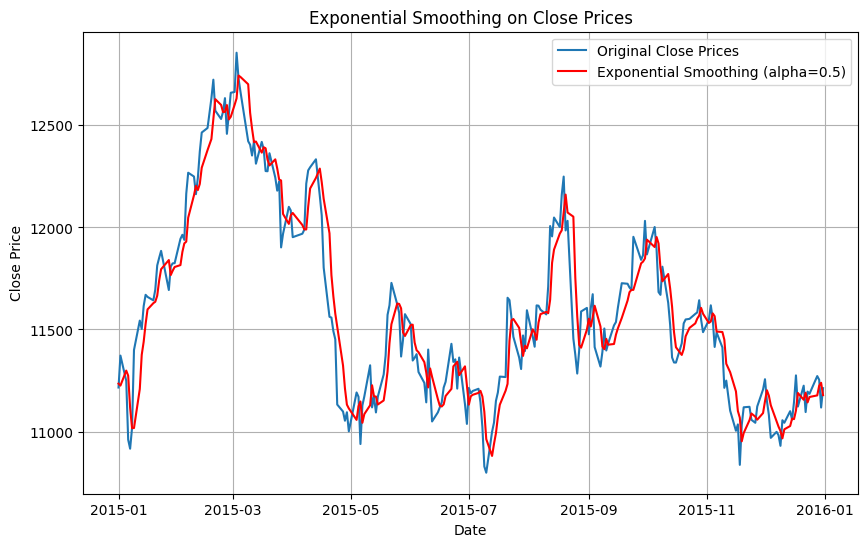

In [40]:
exp_smoothing_model = ExponentialSmoothing(data['Close'], trend=None, seasonal=None, seasonal_periods=None)
exp_smoothing_fit2 = exp_smoothing_model.fit(smoothing_level=0.5)  # You can adjust the smoothing level (alpha)

# Plot the original data along with smoothed data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Original Close Prices')
plt.plot(data.index, exp_smoothing_fit2.fittedvalues, label='Exponential Smoothing (alpha=0.5)', color='red')
plt.title('Exponential Smoothing on Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
exp_smoothing_forecast = exp_smoothing_fit2.forecast(steps=10)
print("Forecast for the next 10 periods:")
print(exp_smoothing_forecast)

Forecast for the next 10 periods:
248    11195.410939
249    11195.410939
250    11195.410939
251    11195.410939
252    11195.410939
253    11195.410939
254    11195.410939
255    11195.410939
256    11195.410939
257    11195.410939
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [42]:
# Calculate RMSE and MSE for Exponential Smoothing
exp_smoothing_rmse = np.sqrt(mean_squared_error(data['Close'][-10:], exp_smoothing_forecast[:10]))
exp_smoothing_mse = mean_squared_error(data['Close'][-10:], exp_smoothing_forecast[:10])

# Print the results
print("Exponential Smoothing RMSE:", exp_smoothing_rmse)
print("Exponential Smoothing MSE:", exp_smoothing_mse)

Exponential Smoothing RMSE: 61.79801013954377
Exponential Smoothing MSE: 3818.9940572071546


Exponential Smoothening

In [43]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [44]:
result = adfuller(data['Close'])
# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Interpret the results
if result[1] <= 0.05:
 print("The time series is likely stationary.")
else:
 print("The time series is likely non-stationary.")

ADF Statistic: -2.1518146342829247
p-value: 0.22419613985333847
Critical Values: {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}
The time series is likely non-stationary.


In [45]:
# Differencing the time series to make it stationary
data_diff = data['Close'].diff().dropna()

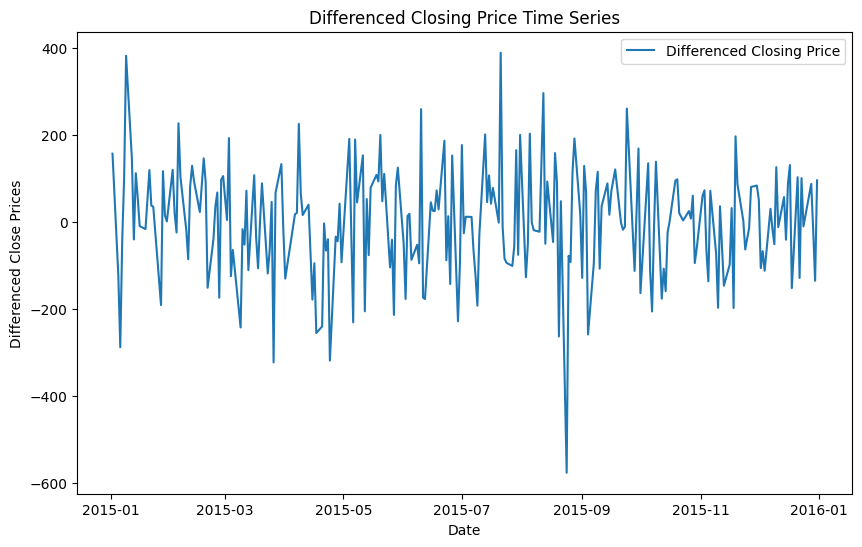

In [46]:
# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Closing Price')
plt.title('Differenced Closing Price Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Close Prices')
plt.legend()
plt.show()

In [47]:
# Perform ADF test on the differenced data
result_diff = adfuller(data_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])
# Interpret the results
if result_diff[1] <= 0.05:
 print("The time series is likely stationary.")
else:
 print("The time series is likely non-stationary.")

ADF Statistic (Differenced): -15.838145170926705
p-value (Differenced): 9.763749764155347e-29
Critical Values (Differenced): {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}
The time series is likely stationary.


In [48]:
data_diff2 = data['Close'].diff().dropna()

In [49]:
# Perform ADF test on the differenced data
result_diff2 = adfuller(data_diff2)
print('ADF Statistic (Differenced):', result_diff2[0])
print('p-value (Differenced):', result_diff2[1])
print('Critical Values (Differenced):', result_diff2[4])
# Interpret the results
if result_diff2[1] <= 0.05:
 print("The time series is likely stationary.")
else:
 print("The time series is likely non-stationary.")

ADF Statistic (Differenced): -15.838145170926705
p-value (Differenced): 9.763749764155347e-29
Critical Values (Differenced): {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}
The time series is likely stationary.


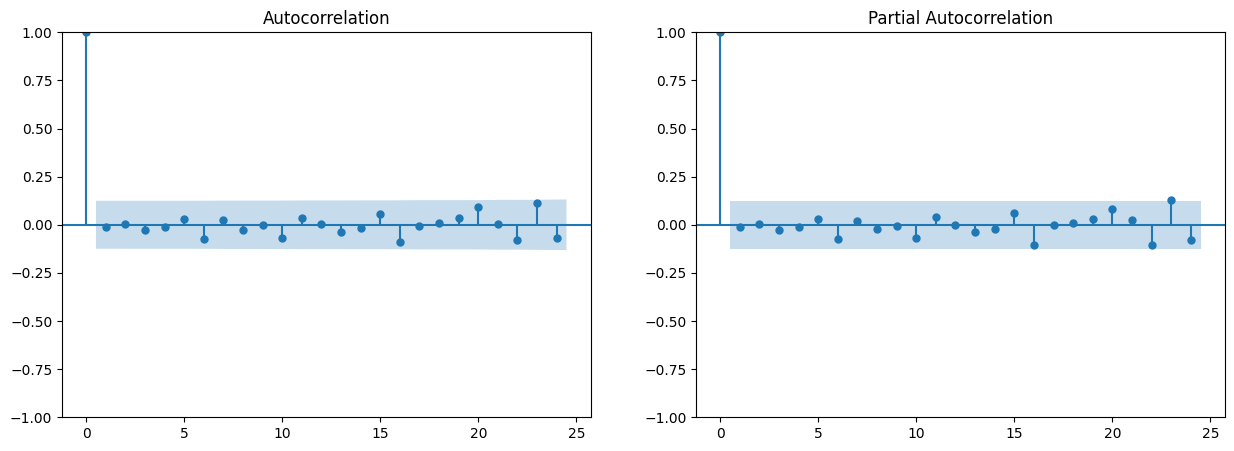

In [50]:
# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(data_diff, ax=axes[0])
plot_pacf(data_diff, ax=axes[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  248
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1627.473
Date:                Thu, 26 Sep 2024   AIC                           3256.946
Time:                        12:59:17   BIC                           3260.451
Sample:                             0   HQIC                          3258.357
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.265e+04   2920.385     11.180      0.000    2.69e+04    3.84e+04
Ljung-Box (L1) (Q):                  62.98   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.00   Pr

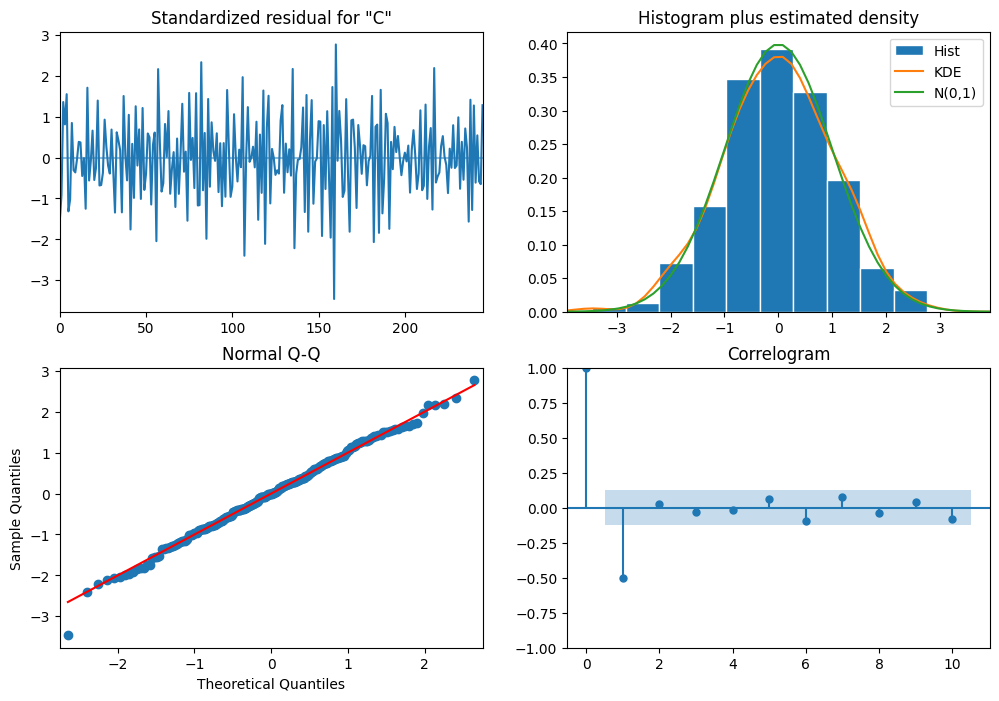

In [52]:
 #Define the parameters based on analysis
p = 0 # Based on PACF plot
d = 2 # Based on differencing (already differentiated)
q = 0 # Based on ACF plot
# Build and fit the ARIMA model
model = ARIMA(data['Close'], order=(p, d, q))
arima_result = model.fit()
# Display the summary of the model
print(arima_result.summary())
# Diagnostics plots
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

In [53]:
start = d  # Since we are differencing by 1, predictions start from the first non-differenced value
end = len(data) - 1  # End at the last row

# Generate predictions for the training set (fitted values)
predictions = arima_result.predict(start=start, end=end, typ='levels')

# Drop the first 'd' rows from the actual data and predictions (because differencing)
actual_values = data['Close'][d:]

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(actual_values, predictions))

# Calculate MSE
mse = mean_squared_error(actual_values, predictions)

print("RMSE:", rmse)
print("MSE:", mse)

RMSE: 180.6940236221558
MSE: 32650.330172764203


ARIMA Evaluation

RMSE = 180 for Arima , 61.8 for Exponential Smoothning , 343 for Moving Average

Hence choosing Exponential Smoothning for the dataset

In [54]:
forecast = exp_smoothing_fit2.forecast(steps=20)
print(forecast) # Print the forecasted values

248    11195.410939
249    11195.410939
250    11195.410939
251    11195.410939
252    11195.410939
253    11195.410939
254    11195.410939
255    11195.410939
256    11195.410939
257    11195.410939
258    11195.410939
259    11195.410939
260    11195.410939
261    11195.410939
262    11195.410939
263    11195.410939
264    11195.410939
265    11195.410939
266    11195.410939
267    11195.410939
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


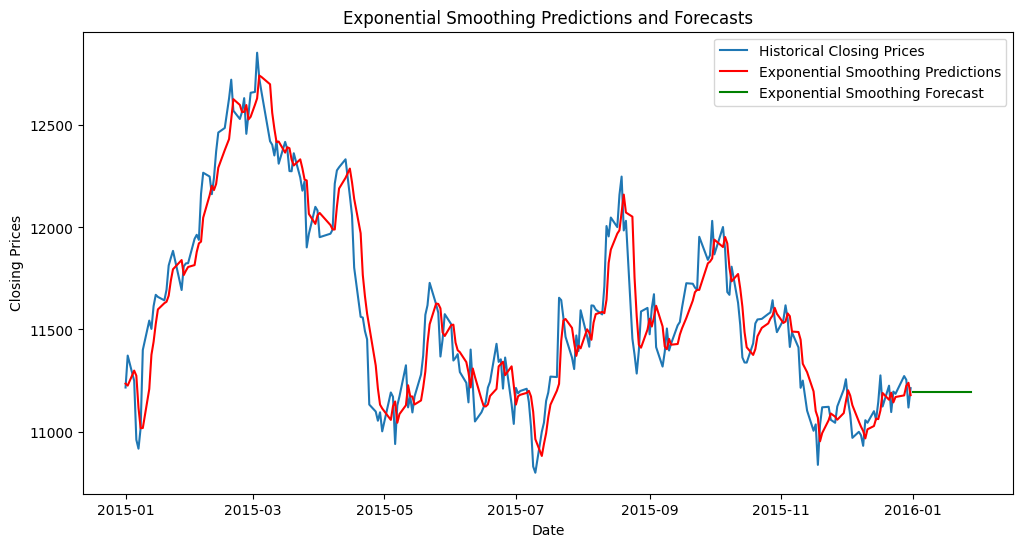

In [55]:
# In-sample predictions (on training data)
predictions_exp = exp_smoothing_fit2.fittedvalues

# Forecast for future values
forecast_steps = 20
forecast_exp = exp_smoothing_fit2.forecast(steps=forecast_steps)

# Adjust the forecast index to start from the end of the historical data
last_date = data.index[-1]
forecast_exp_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]  # Forecast starts one step ahead

# Plotting the historical data, predictions, and forecasts
plt.figure(figsize=(12, 6))

# Historical data from 2015 onwards
plt.plot(data['Close']['2015':], label='Historical Closing Prices')

# In-sample predictions from Exponential Smoothing
plt.plot(predictions_exp['2015':], label='Exponential Smoothing Predictions', color='red')

# Forecast (future values)
plt.plot(forecast_exp_index, forecast_exp, label='Exponential Smoothing Forecast', color='green')

# Adding title and labels
plt.title('Exponential Smoothing Predictions and Forecasts')
plt.xlabel('Date')
plt.ylabel('Closing Prices')

# Show legend and plot
plt.legend()
plt.show()